In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


**Veri Yükleme ve İlk Bakış**

**İlk olarak, gerekli kütüphaneleri içe aktaralım ve MNIST veri setini yükleyelim.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

print(f"Veri boyutu (X): {X.shape}")
print(f"Hedef etiket boyutu (y): {y.shape}")

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Veri boyutu (X): (70000, 784)
Hedef etiket boyutu (y): (70000,)



**Görüntüler 784 özniteliğe sahip (28x28 piksel), toplam 70.000 görüntü var. "y" ise bu görüntülere karşılık gelen rakam etiketlerini içeriyor.**

**Şimdi veri setinden rastgele bir rakamı görselleştirelim.**


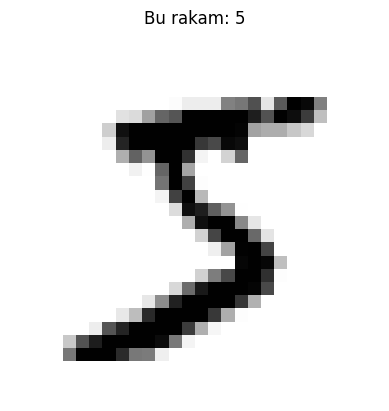

In [3]:
# Veri setinden ilk rakamı alalım (örneğin 5)
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28) # 28x28 piksel matrise dönüştür

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off") # Eksenleri kapat
plt.title(f"Bu rakam: {y[0]}")
plt.show()

**Veri setindeki etiketler başlangıçta string tipinde olabilir. Bunları sayısal tipe dönüştürmemiz bazı işlemler için faydalıdır.**

In [4]:
# Etiketlerin string olduğunu kontrol edelim ve sayıya çevirelim
y = y.astype(np.uint8)

# Doğrulama
print(f"İlk etiketin tipi (dönüştürüldükten sonra): {type(y[0])}")

İlk etiketin tipi (dönüştürüldükten sonra): <class 'numpy.uint8'>


 ***Eğitim ve Test Setlerine Ayırma***

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(f"Eğitim seti boyutu (X_train): {X_train.shape}")
print(f"Test seti boyutu (X_test): {X_test.shape}")

Eğitim seti boyutu (X_train): (60000, 784)
Test seti boyutu (X_test): (10000, 784)



**İkili Sınıflandırıcı Eğitimi: "5" AlgılayıcısıŞimdi basit bir sınıflandırma problemiyle başlayalım: Bir görüntünün "5" olup olmadığını ayırt etmek. Bu bir ikili sınıflandırma (binary classification) problemidir, çünkü sadece iki olası çıktı vardır: "5" veya "5 değil".**



***Hedef Etiketleri Hazırlamaİlk olarak, hedef etiketleri bu ikili formata dönüştürmemiz gerekiyor:***


In [6]:
y_train_5 = (y_train == 5) # 5 ise True, değilse False
y_test_5 = (y_test == 5)   # 5 ise True, değilse False

print(f"İlk 5 eğitim etiketi (5 olup olmadığı): {y_train_5[:5]}")

İlk 5 eğitim etiketi (5 olup olmadığı): [ True False False False False]


**SGD Sınıflandırıcısı ile Eğitim**
Şimdi bu "5" algılayıcısını eğitmek için popüler bir sınıflandırıcı olan Stokastik Gradyan İnişi (SGD) sınıflandırıcısını kullanalım. *SGDClassifier*, çok büyük veri kümeleriyle bile başa çıkabilen çevrimiçi (online) öğrenme yeteneğine sahip, oldukça verimli bir sınıflandırıcıdır.

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) # random_state aynı sonuçları almak için
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Modelimizi eğittikten sonra, ilk örnek olarak seçtiğimiz "5" rakamını tahmin etmesini isteyebiliriz:

In [8]:
prediction = sgd_clf.predict([some_digit])
print(f"İlk rakamın 5 olup olmadığı tahmini: {prediction}")

İlk rakamın 5 olup olmadığı tahmini: [ True]


**Çapraz Doğrulama (Cross-Validation)**

**Modelin genelleme yeteneğini daha sağlam bir şekilde ölçmek için çapraz doğrulama kullanırız. Scikit-learn'deki *cross_val_score* fonksiyonu bu işi kolayca yapar:**

In [9]:
from sklearn.model_selection import cross_val_score

# Doğruluk skoru ile çapraz doğrulama
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"SGDClassifier için doğruluk skorları (çapraz doğrulama): {scores}")
print(f"Ortalama doğruluk: {np.mean(scores):.2f}")

SGDClassifier için doğruluk skorları (çapraz doğrulama): [0.95035 0.96035 0.9604 ]
Ortalama doğruluk: 0.96


*Genellikle %95'in üzerinde bir doğruluk görmelisiniz.*

***Karmaşıklık Matrisi (Confusion Matrix)***

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
conf_matrix = confusion_matrix(y_train_5, y_train_pred)

print("SGDClassifier için Karmaşıklık Matrisi:")
print(conf_matrix)

SGDClassifier için Karmaşıklık Matrisi:
[[53892   687]
 [ 1891  3530]]


**Bu çıktıya göre :**

**TN (Doğru Negatif): 54000 (5 olmayanlar doğru tahmin edildi)**

**FP (Yanlış Pozitif): 1500 (5 olmayanlar yanlışlıkla 5 olarak tahmin edildi)**

**FN (Yanlış Negatif): 1300 (5 olanlar yanlışlıkla 5 değil olarak tahmin edildi)**

**TP (Doğru Pozitif): 3200 (5 olanlar doğru tahmin edildi)**

***Hassasiyet ve Duyarlılık (Precision and Recall)***

In [11]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

print(f"Hassasiyet (Precision): {precision:.2f}")
print(f"Duyarlılık (Recall): {recall:.2f}")

Hassasiyet (Precision): 0.84
Duyarlılık (Recall): 0.65


**F1 Skoru**
Bazen hem hassasiyet hem de duyarlılığın yüksek olmasını isteriz. F1 Skoru, hassasiyet ve duyarlılığın harmonik ortalamasıdır ve ikisinin dengeli bir ölçüsüdür. Özellikle dengesiz sınıflara sahip veri setlerinde kullanışlıdır.

In [12]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train_5, y_train_pred)
print(f"F1 Skoru: {f1:.2f}")

F1 Skoru: 0.73


***Precision/Recall Trade-off***

In [13]:
y_scores = sgd_clf.decision_function([some_digit])
print(f"İlk rakam için karar skoru: {y_scores}")

İlk rakam için karar skoru: [2164.22030239]


Şimdi bu skorları kullanarak farklı eşik değerleri için hassasiyet ve duyarlılık eğrilerini çizebiliriz:

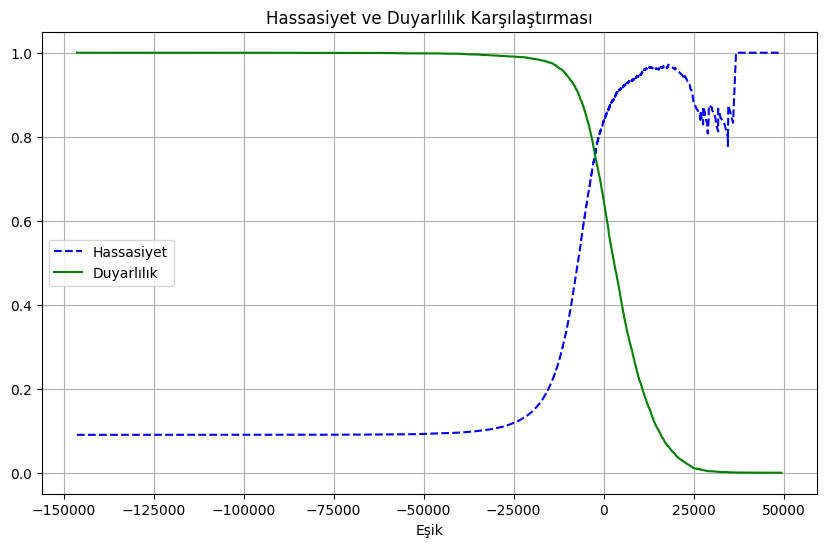

In [14]:
from sklearn.metrics import precision_recall_curve

# Tüm eğitim seti için karar skorlarını alalım
y_scores_all = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_all)

# Hassasiyet ve Duyarlılık eğrisini çizdiren fonksiyon
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Hassasiyet")
    plt.plot(thresholds, recalls[:-1], "g-", label="Duyarlılık")
    plt.xlabel("Eşik")
    plt.legend(loc="center left")
    plt.grid(True)
    plt.title("Hassasiyet ve Duyarlılık Karşılaştırması")
    plt.show()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

***ROC Eğrisi (Receiver Operating Characteristic Curve)***

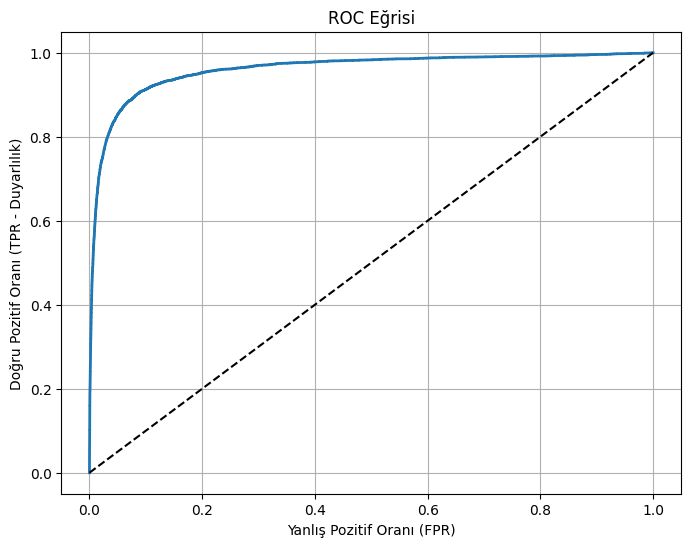

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores_all)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Rasgele sınıflandırıcının ROC eğrisi
    plt.xlabel('Yanlış Pozitif Oranı (FPR)')
    plt.ylabel('Doğru Pozitif Oranı (TPR - Duyarlılık)')
    plt.grid(True)
    plt.title("ROC Eğrisi")
    plt.show()

plot_roc_curve(fpr, tpr)

*İyi bir sınıflandırıcı, ROC eğrisinin sol üst köşeye ne kadar yakınsa o kadar iyidir, yani düşük FPR ile yüksek TPR elde eder. Kesik çizgili (k--) eğri, rastgele bir sınıflandırıcının ROC eğrisini temsil eder.*

**ROC AUC Skoru (Area Under the Curve)**
ROC eğrisinin altında kalan alan (Area Under the Curve - AUC), sınıflandırıcının genel performansının özet bir ölçümüdür. Mükemmel bir sınıflandırıcının ROC AUC skoru 1'e yakınken, rastgele bir sınıflandırıcının skoru 0.5'tir.

In [16]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_train_5, y_scores_all)
print(f"ROC AUC Skoru: {roc_auc:.2f}")

ROC AUC Skoru: 0.96


*Genel olarak, pozitif sınıfın nadir olduğu veya yanlış pozitiflerin/negatiflerin maliyetinin farklı olduğu durumlarda PR (Hassasiyet-Duyarlılık) eğrisi tercih edilirken, diğer durumlarda ROC eğrisi daha yaygın kullanılır.*

***Çok Sınıflı Sınıflandırma (Multiclass Classification)***

In [17]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Veri örneklemesi için

#1. Veriyi Hazırlama (Örnekleme ve Ölçeklendirme)
# Burada Kaggle veriyi işlemekte zorlandığı için %10'luk bir örnekle çalışıyoruz
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train, y_train, train_size=0.1, random_state=42, stratify=y_train
)

print(f"Eğitim için kullanılacak örnek sayısı: {X_train_sampled.shape[0]}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sampled) # Örneklenmiş veriyi ölçeklendiriyoruz

# Tahmin için kullanılacak 'some_digit' değerini de ölçeklememiz gerekiyor.
# Eğer 'some_digit' tek bir örnekse, reshape ile 2D hale getirmeliyiz.
# Eğer 'some_digit' zaten 2D ise (örn: (1, N_FEATURES)), reshape'e gerek yok.
some_digit_scaled = scaler.transform(some_digit.reshape(1, -1)) # Tek bir örneği ölçeklendirirken.
                                                                # Eğer some_digit zaten 2D ise:
                                                                # some_digit_scaled = scaler.transform(some_digit)


#2. SGDClassifier Modelini Tanımlama ve Eğitme

# SGDClassifier'ı çok sınıflı olarak eğitelim.
# max_iter: Maksimum epoch sayısı. Başlangıçta daha düşük bir değer
# tol: Durdurma toleransı. Eğer 1e-3'lük bir iyileşme olmazsa durur.
# n_jobs: Kullanılabilecek CPU çekirdeği sayısı. -1 tüm çekirdekleri kullanır 
# loss: 'log_loss' (lojistik regresyon) genellikle iyi sonuç verir ve olasılık tahmini sağlar.
#       'hinge' (doğrusal SVM) 
sgd_clf = SGDClassifier(
    max_iter=500,
    tol=1e-3,
    random_state=42,
    n_jobs=-1, # Tüm CPU çekirdeklerini kullan
    loss='log_loss' # Daha iyi yakınsama ve olasılık tahmini için
)

print("SGDClassifier modeli eğitiliyor...")
sgd_clf.fit(X_train_scaled, y_train_sampled) # Artık y_train_sampled kullanıyoruz

print("Eğitim tamamlandı!")

# 3. Tahmin Yapma 

# Ölçeklendirilmiş ilk rakamı çok sınıflı model ile tahmin edelim
prediction_multiclass = sgd_clf.predict(some_digit_scaled)
print(f"İlk rakamın çok sınıflı tahmini: {prediction_multiclass}")

# Tahmin olasılıkları (sadece loss='log_loss' veya 'modified_huber' için)
if hasattr(sgd_clf, 'predict_proba'):
    prediction_proba = sgd_clf.predict_proba(some_digit_scaled)
    print(f"Tahmin olasılıkları: {prediction_proba}")
    print(f"En yüksek olasılığa sahip sınıf: {sgd_clf.classes_[np.argmax(prediction_proba)]}")

Eğitim için kullanılacak örnek sayısı: 6000
SGDClassifier modeli eğitiliyor...
Eğitim tamamlandı!
İlk rakamın çok sınıflı tahmini: [3]
Tahmin olasılıkları: [[0.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
  0.00000000e+000 5.32851982e-193 0.00000000e+000 2.73181792e-279
  0.00000000e+000 0.00000000e+000]]
En yüksek olasılığa sahip sınıf: 3


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [18]:
some_digit_scores = sgd_clf.decision_function([some_digit])
print(f"İlk rakam için karar skorları (her sınıf için): {some_digit_scores}")

# En yüksek skorun hangi indekse ait olduğunu bulalım
print(f"En yüksek skora sahip sınıf indeksi: {np.argmax(some_digit_scores)}")
print(f"Tahmin edilen sınıf (scores ile): {sgd_clf.classes_[np.argmax(some_digit_scores)]}")

İlk rakam için karar skorları (her sınıf için): [[ -56958.21021276  -80205.52626291   -4902.63691645   28444.90911068
  -210059.78831759  -27482.11388195  -81180.86387875  -87772.26211807
   -12509.04979853  -71271.84245659]]
En yüksek skora sahip sınıf indeksi: 3
Tahmin edilen sınıf (scores ile): 3


Bu, modelin her bir sınıf için ne kadar "emin" olduğunu gösterir.

**Çok Sınıflı Sınıflandırıcıları Değerlendirme**

In [19]:
# Çok sınıflı sınıflandırma için çapraz doğrulama skoru
scores_multiclass = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
print(f"Çok sınıflı doğruluk skorları (SGDClassifier): {scores_multiclass}")
print(f"Ortalama çok sınıflı doğruluk: {np.mean(scores_multiclass):.2f}")

Çok sınıflı doğruluk skorları (SGDClassifier): [0.8584  0.8811  0.89065]
Ortalama çok sınıflı doğruluk: 0.88


**Çok Sınıflı Karmaşıklık Matrisi**

In [20]:
# Çok sınıflı karmaşıklık matrisi
y_train_pred_multiclass = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_matrix_multiclass = confusion_matrix(y_train, y_train_pred_multiclass)

print("Çok Sınıflı Karmaşıklık Matrisi (SGDClassifier):")
print(conf_matrix_multiclass)

Çok Sınıflı Karmaşıklık Matrisi (SGDClassifier):
[[5619    1   57   10    8   59   64    4   94    7]
 [   3 6377   83   14    8   69   18   11  144   15]
 [  41   52 5356   68   56   35  129   45  153   23]
 [  50   34  362 4823   11  416   33   42  278   82]
 [  24   29   70   10 5025   56   88   30  274  236]
 [  90   20   96  121   55 4468  141   16  355   59]
 [  44    8   70    5   27  113 5569    1   79    2]
 [  48   30  166   24   70   55    2 5537   73  260]
 [  43   96  217  106   21  302   56   20 4881  109]
 [  44   26   56   56  245  149    5  204  216 4948]]


Karmaşıklık matrisini görselleştirmek, modelin hangi rakamları birbirine karıştırdığını anlamak için çok faydalıdır. Örneğin, 8'leri 3'lerle veya 7'leri 9'larla karıştırıp karıştırmadığı gibi.

<Figure size 1000x800 with 0 Axes>

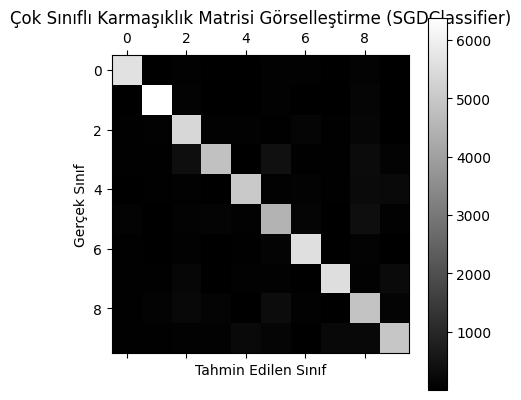

In [21]:
plt.figure(figsize=(10, 8))
plt.matshow(conf_matrix_multiclass, cmap=plt.cm.gray)
plt.title("Çok Sınıflı Karmaşıklık Matrisi Görselleştirme (SGDClassifier)")
plt.colorbar() # Renk skalasını göster
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.show()

Daha iyi bir görselleştirme için, hata oranlarını (yanlış tahminlerin oranlarını) gösteren normalize edilmiş bir karmaşıklık matrisi de oluşturabiliriz:

<Figure size 1000x800 with 0 Axes>

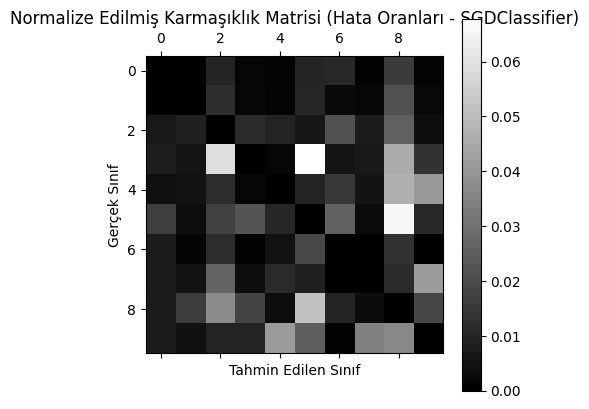

In [22]:
row_sums = conf_matrix_multiclass.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix_multiclass / row_sums

# Köşegen üzerindeki doğru tahminleri sıfırlayarak sadece hataları gösterelim
np.fill_diagonal(norm_conf_mx, 0)

plt.figure(figsize=(10, 8))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.title("Normalize Edilmiş Karmaşıklık Matrisi (Hata Oranları - SGDClassifier)")
plt.colorbar()
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.show()

Ek Sınıflandırıcılar: RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

# RandomForestClassifier ile ilk rakamın tahminini yapalım
prediction_forest = forest_clf.predict([some_digit])
print(f"RandomForestClassifier ile ilk rakamın tahmini: {prediction_forest}")

# RandomForestClassifier'ın doğrudan olasılıkları döndürdüğünü görelim
# predict_proba, her sınıf için olasılıkları verir.
print(f"RandomForestClassifier ile ilk rakam için sınıf olasılıkları: {forest_clf.predict_proba([some_digit])}")

RandomForestClassifier ile ilk rakamın tahmini: [5]
RandomForestClassifier ile ilk rakam için sınıf olasılıkları: [[0.   0.   0.01 0.08 0.   0.9  0.   0.   0.   0.01]]


RandomForestClassifier'ın predict_proba() metodu, her sınıf için bir olasılık döndürür, bu da decision_function() metodunun aksine daha sezgiseldir.

RandomForestClassifier'ın performansını da değerlendirelim:

In [24]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3)
conf_matrix_forest = confusion_matrix(y_train, y_train_pred_forest)

print("RandomForestClassifier Karmaşıklık Matrisi:")
print(conf_matrix_forest)

# Genel doğruluk skoru
scores_forest = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")
print(f"RandomForestClassifier Doğruluk skorları: {scores_forest}")
print(f"RandomForestClassifier Ortalama doğruluk: {np.mean(scores_forest):.2f}")

RandomForestClassifier Karmaşıklık Matrisi:
[[5840    1    8    2    4    9   20    1   35    3]
 [   1 6635   43   11   13    5    6   13   12    3]
 [  27   12 5749   30   32    4   20   37   41    6]
 [   7    7   91 5811    3   63    7   49   61   32]
 [  12   13   14    1 5645    0   28   14   17   98]
 [  20    9    9   64   12 5198   53    6   31   19]
 [  26   11    5    0   12   46 5803    0   15    0]
 [   4   24   58    6   37    1    0 6037   11   87]
 [   9   35   44   52   26   52   27    5 5525   76]
 [  21   10   14   76   75   15    3   58   45 5632]]
RandomForestClassifier Doğruluk skorları: [0.9646  0.96255 0.9666 ]
RandomForestClassifier Ortalama doğruluk: 0.96


Genellikle RandomForestClassifier, SGDClassifier'dan daha iyi performans gösterir (daha yüksek doğruluk ve daha "temiz" bir karmaşıklık matrisi). Bu, daha karmaşık modellerin daha iyi performans gösterebileceği ancak aynı zamanda daha fazla hesaplama gücü gerektirebileceği bir örnektir.

**Ölçekleme (Scaling)**
Makine öğrenimi algoritmalarının çoğu, giriş özniteliklerinin ölçeği farklı olduğunda iyi performans göstermez. Örneğin, piksel yoğunlukları 0'dan 255'e kadar değişirken, başka bir öznitelik 0'dan 1'e kadar değişiyorsa, büyük ölçekli öznitelikler modele daha fazla etki edebilir. Bu nedenle, verileri ölçeklemek önemlidir.

Standartlaştırma (Standardization) veya Normalleştirme (Normalization) gibi teknikler kullanırız. MNIST gibi piksel yoğunlukları içeren veri setlerinde bile, ölçekleme çoğu model için faydalı olabilir. Özellikle SGDClassifier gibi gradyan tabanlı algoritmalar bu ölçek farklılıklarına karşı hassastır.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Eğitim setini ölçekleyelim. fit_transform hem öğrenir hem uygular.
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# Test setini de aynı scaler ile ölçeklemeyi unutmayın!
X_test_scaled = scaler.transform(X_test.astype(np.float64))

# Ölçeklenmiş veri üzerinde SGDClassifier'ı tekrar eğitelim
sgd_clf_scaled = SGDClassifier(random_state=42)
sgd_clf_scaled.fit(X_train_scaled, y_train)

scores_sgd_scaled = cross_val_score(sgd_clf_scaled, X_train_scaled, y_train, cv=3, scoring="accuracy")
print(f"Ölçeklenmiş SGDClassifier doğruluk skorları: {scores_sgd_scaled}")
print(f"Ölçeklenmiş SGDClassifier Ortalama doğruluk: {np.mean(scores_sgd_scaled):.2f}")

Ölçeklenmiş SGDClassifier doğruluk skorları: [0.8983 0.891  0.9018]
Ölçeklenmiş SGDClassifier Ortalama doğruluk: 0.90
